In [ ]:
'''
import os
db_path = "/content/drive/MyDrive/Deep learning Class Project/plankton_db"
class_num = 1
for dirname in sorted(os.listdir(db_path)):
    merged_path = os.path.join(db_path, dirname)
    if os.path.isdir(merged_path):
       print(dirname)
       #holder, class_num = dirname.split('-', 2)
       counter = 0
       for i, filename in enumerate(os.listdir(merged_path)):
           #img_class, img_type = filename.split('.', 2)
           img_merged_path = os.path.join(merged_path, filename)
           new_filename = os.path.join(merged_path, str(class_num) + '_'+ str(counter) + '.png')
           print(new_filename)
           os.rename(img_merged_path, new_filename) 
           counter = counter + 1    
    class_num = class_num + 1
 '''   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from shutil import copyfile
db_path = "/content/drive/MyDrive/Deep learning Class Project/plankton_db"
classes = os.listdir(db_path)
print(classes)

['Ceratium', 'Cerataulina', 'Chaetoceros', 'Entomoneis', 'Guinardia', 'Hemiaulus', 'Nitzschia', 'Lauderia annulata', 'Noctiluca', 'Alexandrium', 'Pyrodinium', 'Protoperidinium', 'Prorocentrum', 'Pleurosigma', 'Pinnularia', 'Thalassiosira', 'Asterionellopsis glacialis', 'Thalassionema', 'Ornithocercus magnificus']


In [ ]:
'''
try:
   #os.mkdir('/content/drive/MyDrive/Deep learning Class Project/dataset_pm')
   os.mkdir('/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training')
   os.mkdir('/content/drive/MyDrive/Deep learning Class Project/dataset_pm/validation')
   os.mkdir('/content/drive/MyDrive/Deep learning Class Project/dataset_pm/test')
except OSError:
  pass

training_dir_path=[f'/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/{a}' for a in classes]
print('\n',training_dir_path)
validation_dir_path=[f'/content/drive/MyDrive/Deep learning Class Project/dataset_pm/validation/{a}' for a in classes]
print('\n',validation_dir_path)
testing_dir_path=[f'/content/drive/MyDrive/Deep learning Class Project/dataset_pm/test/{a}' for a in classes]
print('\n',testing_dir_path)
'''


 ['/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Ceratium', '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Cerataulina', '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Chaetoceros', '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Entomoneis', '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Guinardia', '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Hemiaulus', '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Nitzschia', '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Lauderia annulata', '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Noctiluca', '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Alexandrium', '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training/Pyrodinium', '/content/drive/MyDrive/Deep learning Class Project/datase

In [ ]:
'''
paths, dirs, file_name = next(os.walk("/content/drive/MyDrive/Deep learning Class Project/plankton_db/"))
for dir in dirs:
    path_h, dirs_h, files = next(os.walk(os.path.join("/content/drive/MyDrive/Deep learning Class Project/plankton_db/", dir)))
    file_count = len(files)
    print("{}: {}".format(dir, file_count))


    # here we split into train, test and validation
    training_length = int(len(files)* 0.80)
    validation_length = int(len(files) * 0.10)
    testing_length = int(len(files) - training_length - validation_length)
    
    temp_folder = []
    merged_path = os.path.join(db_path, dir)
    for i, imgs in enumerate(os.listdir(merged_path)):
        temp_folder.append(imgs)        

    training_set = temp_folder[0: training_length]
    validation_set = temp_folder[training_length+1 : (training_length+validation_length)]
    testing_set = temp_folder[:testing_length]

    train_path = '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training'
    try:
        os.mkdir(os.path.join(train_path, dir))
    except OSError:
        pass

    for filename in training_set:
        this_file = os.path.join(merged_path, filename)
        temp_dest1 = os.path.join(train_path, dir)
        destination = os.path.join(temp_dest1, filename)
        copyfile(this_file, destination)

    validation_path = '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/validation'
    try:
        os.mkdir(os.path.join(validation_path, dir))
    except OSError:
        pass

    for filename in validation_set:
        this_file = os.path.join(merged_path, filename)
        temp_dest2 = os.path.join(validation_path, dir)
        destination = os.path.join(temp_dest2, filename)
        copyfile(this_file, destination)
        
    test_path = '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/test'
    try:
        os.mkdir(os.path.join(test_path, dir))
    except OSError:
        pass

    for filename in testing_set:
        this_file = os.path.join(merged_path, filename)
        temp_dest3 = os.path.join(test_path, dir)
        destination = os.path.join(temp_dest3, filename)
        copyfile(this_file, destination)  
'''


Ceratium: 108
Cerataulina: 150
Chaetoceros: 58
Entomoneis: 44
Guinardia: 135
Hemiaulus: 14
Nitzschia: 24
Lauderia annulata: 29
Noctiluca: 15
Alexandrium: 12
Pyrodinium: 5
Protoperidinium: 18
Prorocentrum: 103
Pleurosigma: 32
Pinnularia: 13
Thalassiosira: 64
Asterionellopsis glacialis: 182
Thalassionema: 21
Ornithocercus magnificus: 9


In [ ]:
# Image augmentation
'''
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util, io
import random

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array, mode= 's&p', amount = 0.3)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]
    '''

In [ ]:
'''
import imageio.core.util

def silence_imageio_warning(*args, **kwargs):
    pass

imageio.core.util._precision_warn = silence_imageio_warning

# dictionary of the transformations we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

# our folder path containing some images
db_path = '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training'

for dirname in sorted(os.listdir(db_path)):
    folder_path = os.path.join(db_path, dirname)
    
    # the number of file to generate
    path_h, dirs_h, files = next(os.walk(folder_path))
    if len(files) < 150:
       num_files_desired = 150 - len(files)
       print('Directory: {}, Num_Files: {}, Files to Add: {}'.format(dirname, len(files), num_files_desired))

    # loop on all files of the folder and build a list of files paths
    images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    num_generated_files = 0
    while num_generated_files <= num_files_desired:
          # random image from the folder
          image_path = random.choice(images)
          # read image as an two dimensional array of pixels
          image_to_transform = sk.io.imread(image_path)

          # random num of transformation to apply
          num_transformations_to_apply = random.randint(1, len(available_transformations))

          num_transformations = 0
          transformed_image = None

          while num_transformations <= num_transformations_to_apply:
                # random transformation to apply for a single image
                key = random.choice(list(available_transformations))
                transformed_image = available_transformations[key](image_to_transform)
                num_transformations += 1
                 
                new_file_path = '%s/augmented_image_%s.png' % (folder_path, num_generated_files)

                # write image to the disk
                io.imsave(new_file_path, transformed_image)
                num_generated_files += 1
                '''

Directory: Alexandrium, Num_Files: 9, Files to Add: 141
Directory: Asterionellopsis glacialis, Num_Files: 145, Files to Add: 5
Directory: Cerataulina, Num_Files: 120, Files to Add: 30
Directory: Ceratium, Num_Files: 86, Files to Add: 64
Directory: Chaetoceros, Num_Files: 46, Files to Add: 104
Directory: Entomoneis, Num_Files: 35, Files to Add: 115
Directory: Guinardia, Num_Files: 108, Files to Add: 42
Directory: Hemiaulus, Num_Files: 11, Files to Add: 139
Directory: Lauderia annulata, Num_Files: 23, Files to Add: 127
Directory: Nitzschia, Num_Files: 19, Files to Add: 131
Directory: Noctiluca, Num_Files: 12, Files to Add: 138
Directory: Ornithocercus magnificus, Num_Files: 7, Files to Add: 143
Directory: Pinnularia, Num_Files: 10, Files to Add: 140
Directory: Pleurosigma, Num_Files: 25, Files to Add: 125
Directory: Prorocentrum, Num_Files: 82, Files to Add: 68
Directory: Protoperidinium, Num_Files: 14, Files to Add: 136
Directory: Pyrodinium, Num_Files: 4, Files to Add: 146
Directory: T

In [ ]:
#!pip install --upgrade pillow
db_path = "/content/drive/MyDrive/Deep learning Class Project/plankton_db"
train_path = '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training'
validation_path = '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/validation'
test_path = '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/test'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from numpy.random import seed
seed(1337)
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from plot_conf_matr import plot_confusion_matrix

In [ ]:
import os
category_names = sorted(os.listdir(train_path))
nb_categories = len(category_names)

In [ ]:
img_height, img_width = 224, 224
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
conv_base.trainable = False   # freeze the convolutional base
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_10 (Dense)             (None, 19)                4883      
Total params: 21,142,355
Trainable params: 6,427,667
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,                                 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range = (0.9,1.1),
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale = 1./255)

print('Total number of images for training: ')
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size, 
                                                    class_mode = "categorical")

print('Total number of images for validation: ')
val_generator = val_datagen.flow_from_directory(validation_path,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size, 
                                                class_mode = "categorical",
                                                shuffle = False)

#this might not be necessary
print('Total number of images for testing: ')
test_generator = test_datagen.flow_from_directory(test_path,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size, 
                                                class_mode = "categorical",
                                                shuffle = False)    


Total number of images for training: 
Found 2872 images belonging to 19 classes.
Total number of images for validation: 
Found 92 images belonging to 19 classes.
Total number of images for testing: 
Found 118 images belonging to 19 classes.


In [ ]:
learning_rate = 5e-5
epochs = 20
#stepPerEpoch_training =  150 // batch_size 
checkpoint = ModelCheckpoint("plankton_classifier.h5", 
                             monitor = 'val_acc',
                             verbose=1, 
                             save_best_only = True, 
                             save_Weights_only = False, 
                             mode = 'auto', period=1)

model.compile(loss = "categorical_crossentropy", 
              optimizer = optimizers.Adam(lr = learning_rate, clipnorm = 1.),
              metrics = ['acc'])

history = model.fit_generator(train_generator,
                              epochs=epochs,
                              shuffle=True,
                              validation_data=val_generator,
                              callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
90/90 [==============================] - 1815s 20s/step - loss: 2.6805 - acc: 0.2046 - val_loss: 1.5966 - val_acc: 0.5652

Epoch 00001: val_acc improved from -inf to 0.56522, saving model to plankton_classifier.h5
Epoch 2/20
90/90 [==============================] - 1820s 20s/step - loss: 1.6451 - acc: 0.5543 - val_loss: 1.0984 - val_acc: 0.7065

Epoch 00002: val_acc improved from 0.56522 to 0.70652, saving model to plankton_classifier.h5
Epoch 3/20
90/90 [==============================] - 1820s 20s/step - loss: 1.2776 - acc: 0.6342 - val_loss: 1.0409 - val_acc: 0.6848

Epoch 00003: val_acc did not improve from 0.70652
Epoch 4/20
90/90 [==============================] - 1822s 20s/step - loss: 1.1295 - acc: 0.6926 - val_loss: 0.8522 - val_acc: 0.7609

Epoch 00004: val_acc improved from 0.70652 to 0.76087, saving model to plankton_classifier.h5
Epoch 5/20
90/90 [==============================] - 1818s 20s/step - loss: 1.0042 - acc: 0.7078 - val_loss: 0.8446 - val_acc: 0.7609

E

In [ ]:
model = models.load_model("plankton_classifier.h5")

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(1, figsize = (15,8))
plt.subplot(221)
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
#plt.savefig('Accuracy.jpg')

plt.subplot(222)
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Accuracy in test set: 53.4% 


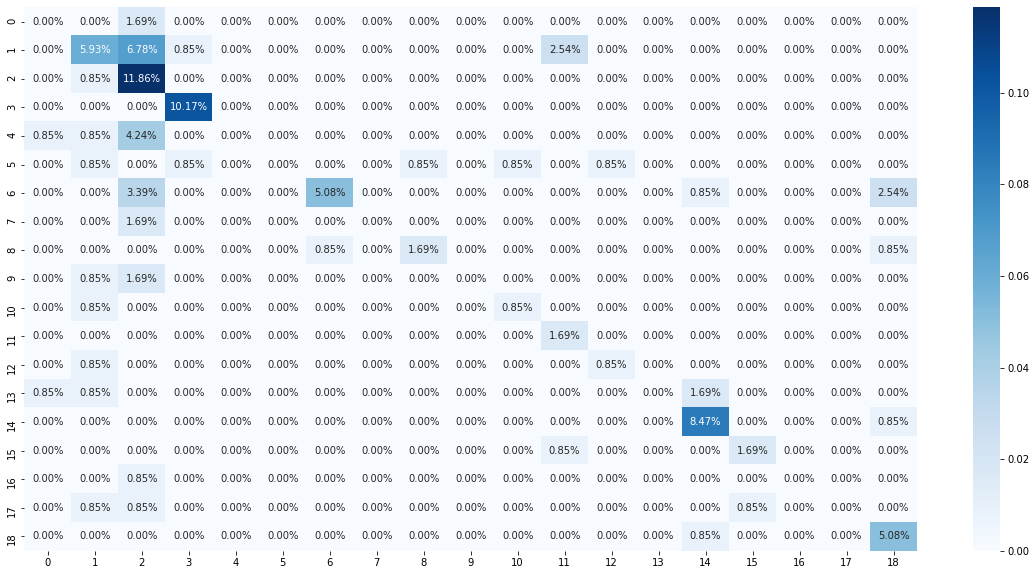

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize = (20,10))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', annot_kws={"size": 10})

accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))
#print "recall score",metrics.recall_score(true_label, predicted, average='macro')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("F1_Score: %0.2f%% " % (f1_score(test_generator.classes, y_pred, average="macro")*100)) 

F1_Score: 34.89% 


In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.47      0.37      0.41        19
           2       0.36      0.93      0.52        15
           3       0.86      1.00      0.92        12
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       0.00      0.00      0.00         2
           8       0.67      0.50      0.57         4
           9       0.00      0.00      0.00         3
          10       0.50      0.50      0.50         2
          11       0.33      1.00      0.50         2
          12       0.50      0.50      0.50         2
          13       0.00      0.00      0.00         4
          14       0.71      0.91      0.80        11
          15       0.67      0.67      0.67         3
          16       0.00      0.00      0.00         1
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fine tune the model by adding dense layer

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 19)                1235      
Total params: 14,789,843
Trainable params: 75,155
Non-trainable params: 14,714,688
_____________________________________

In [ ]:
learning_rate = 5e-5
epochs = 30
checkpoint = ModelCheckpoint("plankton_classifier_2.h5", 
                             monitor = 'val_acc',
                             verbose=1, 
                             save_best_only = True, 
                             save_Weights_only = False, 
                             mode = 'auto', period=1)

model.compile(loss = "categorical_crossentropy", 
              optimizer = optimizers.Adam(lr = learning_rate, clipnorm = 1.),
              metrics = ['acc'])

history = model.fit_generator(train_generator,
                              epochs=epochs,
                              shuffle=True,
                              validation_data=val_generator,
                              callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
4/4 [==============================] - 133s 36s/step - loss: 2.9943 - acc: 0.0688 - val_loss: 3.1702 - val_acc: 0.0109

Epoch 00001: val_acc improved from -inf to 0.01087, saving model to plankton_classifier_2.h5
Epoch 2/100


KeyboardInterrupt: ignored

In [ ]:
model = models.load_model("plankton_classifier_2.h5")

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(1, figsize = (15,8))
plt.subplot(221)
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
#plt.savefig('Accuracy.jpg')

plt.subplot(222)
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize = (20,10))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', annot_kws={"size": 10})

accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))
#print "recall score",metrics.recall_score(true_label, predicted, average='macro')

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(metrics.classification_report(test_generator.classes, y_pred))
print("F1_Score: %0.2f%% " % (f1_score(test_generator.classes, y_pred, average="macro")*100)) 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
model.save('plankton_classifier.h5')
model.save('plankton_classifier_2.h5')